In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Nov 26 02:03:54 2019

@author: trush
"""

# Python program to generate word vectors using Word2Vec

from nltk.tokenize import sent_tokenize, word_tokenize
import warnings
import gensim

warnings.filterwarnings(action='ignore')


# from User Defined python file
# from Visualize import TSNE_based_visualization, PCA_based_visualization, create_CSV_file


def skip_gram_model(dataset_file_loc, model_name, file_dir_to_save, string_based=0, lines=None,hs=0):
    if string_based == 1:
        data = need_for_data(dataset_file_loc, lines=lines, string_based=string_based)
    else:
        data = need_for_data(dataset_file_loc, lines=lines)

    model_name = model_name + '_SG.w2v'

    print("\nSKIP GRAM\n" + "=" * 15)
    print("Training Model using Skip Gram ")
    sg_model = gensim.models.Word2Vec(data, min_count=1, size=300, window=5,
                                      sg=1, workers=1,hs=hs)  # add worker in argument for multi threading
    sg_model.save(file_dir_to_save + '\\' + model_name )  # to save the trained model
    print("\nTotal Training time : ", sg_model.total_train_time)
    print("SKIP GRAM MODEL saved successfully...")
    print("At location :" + file_dir_to_save + "\\" + model_name + ".w2v")


def cbow(dataset_file_loc, model_name, file_dir_to_save, string_based=0, lines=None,hs=0):
    if string_based == 1:
        data = need_for_data(dataset_file_loc, lines=lines, string_based=string_based)
    else:
        data = need_for_data(dataset_file_loc, lines=lines)

    model_name = model_name + '_CBOW.w2v'
    print("\nCBOW\n" + "=" * 15)
    print("Training Model using CBOW ")

    cbow_model = gensim.models.Word2Vec(data, min_count=1, size=300,
                                        window=5, workers=1,hs=hs)  # workers for multithreading
    cbow_model.save(file_dir_to_save + '\\' + model_name )  # to save the trained model

    print("\nTotal Training Time :", cbow_model.total_train_time)
    print("SKIP GRAM MODEL saved successfully...")
    print("At location :" + file_dir_to_save + "\\" + model_name + ".w2v")


def need_for_data(file_name, string_based=None, lines=None):
    if string_based is None:
        total_words = int()
        file = open(file_name, 'rt', encoding="UTF-8")
        if lines == None:
            lines = len(file.readlines())
        sample = str()
        file.seek(0, 0)
        for i in range(lines):
            sample += file.readline(i)
    else:
        sample = input("Enter String ")

    f = sample.replace("\n", " ")  # Replaces escape character with space
    data = []

    for i in sent_tokenize(f):  # iterate through each sentence in the file
        temp = []
        for j in word_tokenize(i):  # tokenize the sentence into words
            temp.append(j.lower())
        data.append(temp)
        total_words += len(temp)

    # find total numbers of line in file
    file.seek(0, 0)
    print("\nTotal No of Lines in FILE :", (len(file.readlines())))
    print("Total No of Lines used for training model :", lines)
    print("Total No of words used for training model :", total_words)
    return data


def load_model(file_loc):
    model = gensim.models.Word2Vec.load(file_loc)
    print("\nModel successfully loaded...")
    return model


def cosine_similarity(model, word1, word2):
    print("Cosine similarity between " + word1 + " and " + word2 + " - CBOW : ",
          model.wv.similarity(word1, word2))


def vector_distance(model, word1, word2, type_of_model=None):
    d = model.wv.distance(word1, word2)
    print(type_of_model, " Distance between " + word1 + " and " + word2 + " : ", d)
    return d


def vocab_save(model, file_dir, file_name):
    file = open(file_dir + "\\" + file_name + ".txt", 'wt', encoding='UTF-8')
    for i in model.wv.vocab:
        file.writelines(i + "\n")
    file.close()
    print("\nVocabulary saved successfully...")
    print("At location :" + file_dir + "\\" + file_name + ".txt")


def vocab_size(model):
    count = int()
    for i in model.wv.vocab:
        count += 1
    print("Total Vocabulary :", count)

def most_similar(model, word):
    print("Most Similar to " + word + " : \n",model.wv.most_similar(word))

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Tue Nov 26 02:03:54 2019

@author: trush
"""

# Python program to generate word vectors using Word2Vec

from nltk.tokenize import sent_tokenize, word_tokenize
import warnings
import gensim

warnings.filterwarnings(action='ignore')


# from User Defined python file
# from Visualize import TSNE_based_visualization, PCA_based_visualization, create_CSV_file


def skip_gram_model(dataset_file_loc, model_name, file_dir_to_save, string_based=0, lines=None,hs=0):
    if string_based == 1:
        data = need_for_data(dataset_file_loc, lines=lines, string_based=string_based)
    else:
        data = need_for_data(dataset_file_loc, lines=lines)

    model_name = model_name + '_SG.w2v'

    print("\nSKIP GRAM\n" + "=" * 15)
    print("Training Model using Skip Gram ")
    sg_model = gensim.models.Word2Vec(data, min_count=1, size=300, window=5,
                                      sg=1, workers=1,hs=hs)  # add worker in argument for multi threading
    sg_model.save(file_dir_to_save + '\\' + model_name )  # to save the trained model
    print("\nTotal Training time : ", sg_model.total_train_time)
    print("SKIP GRAM MODEL saved successfully...")
    print("At location :" + file_dir_to_save + "\\" + model_name + ".w2v")


def cbow(dataset_file_loc, model_name, file_dir_to_save, string_based=0, lines=None,hs=0):
    if string_based == 1:
        data = need_for_data(dataset_file_loc, lines=lines, string_based=string_based)
    else:
        data = need_for_data(dataset_file_loc, lines=lines)

    model_name = model_name + '_CBOW.w2v'
    print("\nCBOW\n" + "=" * 15)
    print("Training Model using CBOW ")

    cbow_model = gensim.models.Word2Vec(data, min_count=1, size=300,
                                        window=5, workers=1,hs=hs)  # workers for multithreading
    cbow_model.save(file_dir_to_save + '\\' + model_name )  # to save the trained model

    print("\nTotal Training Time :", cbow_model.total_train_time)
    print("SKIP GRAM MODEL saved successfully...")
    print("At location :" + file_dir_to_save + "\\" + model_name + ".w2v")


def need_for_data(file_name, string_based=None, lines=None):
    if string_based is None:
        total_words = int()
        file = open(file_name, 'rt', encoding="UTF-8")
        if lines == None:
            lines = len(file.readlines())
        sample = str()
        file.seek(0, 0)
        for i in range(lines):
            sample += file.readline(i)
    else:
        sample = input("Enter String ")

    f = sample.replace("\n", " ")  # Replaces escape character with space
    data = []

    for i in sent_tokenize(f):  # iterate through each sentence in the file
        temp = []
        for j in word_tokenize(i):  # tokenize the sentence into words
            temp.append(j.lower())
        data.append(temp)
        total_words += len(temp)

    # find total numbers of line in file
    file.seek(0, 0)
    print("\nTotal No of Lines in FILE :", (len(file.readlines())))
    print("Total No of Lines used for training model :", lines)
    print("Total No of words used for training model :", total_words)
    return data


def load_model(file_loc):
    model = gensim.models.Word2Vec.load(file_loc)
    print("\nModel successfully loaded...")
    return model


def cosine_similarity(model, word1, word2):
    print("Cosine similarity between " + word1 + " and " + word2 + " - CBOW : ",
          model.wv.similarity(word1, word2))


def vector_distance(model, word1, word2, type_of_model=None):
    d = model.wv.distance(word1, word2)
    print(type_of_model, " Distance between " + word1 + " and " + word2 + " : ", d)
    return d


def vocab_save(model, file_dir, file_name):
    file = open(file_dir + "\\" + file_name + ".txt", 'wt', encoding='UTF-8')
    for i in model.wv.vocab:
        file.writelines(i + "\n")
    file.close()
    print("\nVocabulary saved successfully...")
    print("At location :" + file_dir + "\\" + file_name + ".txt")


def vocab_size(model):
    count = int()
    for i in model.wv.vocab:
        count += 1
    print("Total Vocabulary :", count)

def most_similar(model, word):
    print("Most Similar to " + word + " : \n",model.wv.most_similar(word))

In [3]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure

output_notebook()
from bokeh.plotting import show, figure
%matplotlib inline

Loading BokehJS ...

In [4]:
model = load_model(r"C:\Users\trush\OneDrive\Documents\Projects\Python\Word2Vec\SG.w2v")


Model successfully loaded...


In [5]:
TSNE_based_visualization(model)

NameError: name 'TSNE_based_visualization' is not defined

In [6]:
from sklearn.manifold import TSNE
import pandas as pd
from bokeh.io import output_notebook
from bokeh.plotting import show, figure
from sklearn.decomposition import PCA
from matplotlib import pyplot
import matplotlib.font_manager as mfm
import matplotlib.pyplot as plt
import numpy as np

font_path = r"C:\Users\trush\OneDrive\Documents\Projects\Python\Word2Vec\Font\shruti.ttf"
prop = mfm.FontProperties(fname=font_path)

'''
Functions:-
	1	create_CSV_file(model,file_dir, file_name)
			-Library used: from sklearn.manifold import TSNE 
			
			-to create a CSV file of 2D,3D,etc. dimension of vocabulary word
			-file_dir = suitable directory for file 
			-file_name = suitable name for file
			-model = gensim trained Word2Vec model
	
	
	2	PCA_based_visualization(model)
			-Libarary used : from sklearn.decomposition import PCA
							 import matplotlib.pyplot as plt
			
			-model = gensim trained Word2Vec model
			-Principal Component Analysis based Dimension Reduction 
			
			
	3	TSNE_based_visualization(model)
			-Library used: from sklearn.manifold import TSNE , 
							 import matplotlib.pyplot as plt
		
			-model = gensim trained Word2Vec model
			-T-SNE based Dimension Reduction 	
'''


def create_CSV_file(model, file_dir, file_name):
    X = model.wv.__getitem__(model.wv.vocab)
    tsne = TSNE(n_components=2, n_iter=1000)  # 200 is minimum iter; default is 1000
    X_2d = tsne.fit_transform(X)

    # create DataFrame for storing results and plotting
    coords_df = pd.DataFrame(X_2d, columns=['x', 'y'])
    coords_df['token'] = model.wv.vocab.keys()
    coords_df.head()

    coords_df.to_csv(file_dir + "\\" + file_name + '.csv', index=False)
    print("\nCSV file of vocabulary saved successfully...")
    print("At location :" + file_dir + "\\" + file_name + ".csv")

    # coords_df = pd.read_csv(name_of_file + '.csv')
    # return coords_df


def PCA_based_visualization(model, dimension=2, vocabulary=None):  # more work ahead for dimension > 2):
    if vocabulary is None:
        X = model.wv.__getitem__(model.wv.vocab)
        word_labels = [i for i in model.wv.vocab]

    else:
        X = np.empty((0, 300), dtype='f')
        word_labels = vocabulary

        for wrd in word_labels:
            wrd_vector = model.wv.__getitem__(wrd)
            X = np.append(X, np.array([wrd_vector]), axis=0)

        np.set_printoptions(suppress=True)

    pca = PCA(n_components=2)
    result = pca.fit_transform(X)
    x_coords = result[:, 0]
    y_coords = result[:, 1]

    # create a scatter plot of the projection
    pyplot.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.text(x, y, s=label, fontproperties=prop)
        # plt.annotate((label), xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min() + 0.00005, x_coords.max() + 0.00005)
    plt.ylim(y_coords.min() + 0.00005, y_coords.max() + 0.00005)
    plt.show()

    pyplot.show()


def TSNE_based_visualization(model, dimension=2, n_iter=1000, vocabulary=None,
                             method='barnes_hut',learning_rate=500,perplexity=30):  # more work ahead for dimension > 2
    if vocabulary is None:
        X = model.wv.__getitem__(model.wv.vocab)
        word_labels = [i for i in model.wv.vocab]

    else:
        X = np.empty((0, 300), dtype='f')
        word_labels = vocabulary

        for wrd in word_labels:
            wrd_vector = model.wv.__getitem__(wrd)
            X = np.append(X, np.array([wrd_vector]), axis=0)

        np.set_printoptions(suppress=True)

    tsne = TSNE(n_components=dimension, n_iter=n_iter, random_state=0, perplexity=perplexity, learning_rate=learning_rate,
                method=method)  # 200 is minimum iter; default is 1000
    X_tsne = tsne.fit_transform(X)
    x_coords = X_tsne[:, 0]
    y_coords = X_tsne[:, 1]

    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.text(x, y, s=label, fontproperties=prop)
        # plt.annotate((label), xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min() + 0.00005, x_coords.max() + 0.00005)
    plt.ylim(y_coords.min() + 0.00005, y_coords.max() + 0.00005)
    plt.show()


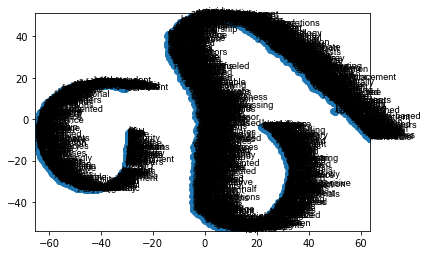

In [7]:
TSNE_based_visualization(model)